# QuadPay: data_viz_analysis

#### Goal
Create data visualizations that allow for a deeper understanding of the features and their relationship to the outcome variables. 


#### Approach
We'll start by viewing basic distributions and correlation plots for customer and merchant metrics. From there, we'll dig into relationships between individual features. Within each section, we've plotted select features and provided takeaways from the plot. We've analyzed features from the following high-level views:
+ Distributions of customer metrics
+ Crossplot correlation of customer metrics
+ Impact of credit score, order amount, and age on repayment
+ Progression of repayment across installments
+ Differences in transactions and repayment by merchant

Given more time, we would iterate/improve the selection of data visualizations used. Due to time constraints, we have limited to types of plots and have focused more on the insights from the plots. 


#### Resources
+ [QuadPay Machine Learning Engineer Assignment](https://docs.google.com/document/d/1DUixAKGXQqFwhAIL7Sk-yhE_TqM7TovFnMyztVbMGNM/edit)
+ [Seaborn](https://seaborn.pydata.org/index.html) has been used as the data visualization package for this analysis. 
+ [Zip Code Data](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi)

<br>


<br>

### Get data

In [1]:
import sys
sys.path.append('/home/jovyan/quadpay_analysis/src')


In [2]:
import pandas as pd
import viz

ORDERS_DATA = '../data/transformed_orders.csv'


In [3]:
# help(chartify)

orders = pd.read_csv(ORDERS_DATA)
orders.head()


,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,...,merchant_paid_installment_2_ratio,merchant_paid_installment_3_ratio,merchant_paid_installment_4_ratio,log_order_amount,log_order_amount_cum_sum,log_order_amount_cum_avg,checkout_started_datetime,checkout_month_num,checkout_weekday_num,checkout_is_weekend
0,E4BBCD,0005F1,8B9AB8,169.00,2018-08-30 22:39:26.397,2018-08-30 22:39:27.757,True,711,25,34266,...,1,1.0,1.0,5.129899,5.129899,5.129899,2018-08-30 22:39:26,8,3,False
1,E128F5,0005F1,8B9AB8,297.00,2018-09-27 13:58:34.243,2018-09-27 13:58:34.523,True,711,25,34266,...,1,1.0,1.0,5.693732,5.693732,5.693732,2018-09-27 13:58:34,9,3,False
2,A39F4B,0008C3,8D665E,109.00,2018-09-08 04:20:36.700,2018-09-08 04:20:37.950,True,588,35,89183,...,1,1.0,1.0,4.691348,4.691348,4.691348,2018-09-08 04:20:36,9,5,True
3,BFFC42,000A1F,944AC9,1036.78,2018-09-28 15:38:18.650,2018-09-28 15:38:18.947,True,624,21,16117,...,1,1.0,1.0,6.943875,6.943875,6.943875,2018-09-28 15:38:18,9,4,False
4,A91B2B,000B25,26ECA2,58.06,2018-09-11 02:20:55.423,2018-09-11 02:20:56.530,True,611,19,32817,...,1,1.0,1.0,4.061477,4.061477,4.061477,2018-09-11 02:20:55,9,1,False


In [4]:
# list(orders)

<br>

### Distributions of customer metrics
+ Purchases are most often less than $125 but have a long tail up to 1,500
+ There's almost a normal distribution of credit scores; however, there's an unexpected share of users with a 610 credit score. We should compare this to the general population to ensuer it isn't an outlier.
+ The customer base has an abnormal age distribution, likely due to the simulated data generator. 
+ The largest share of purchaes happen Thursdays to Saturday, with the highest share of purchases on Friday. 


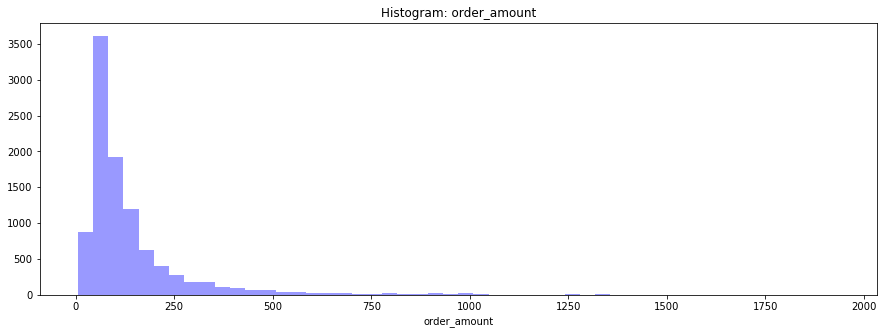

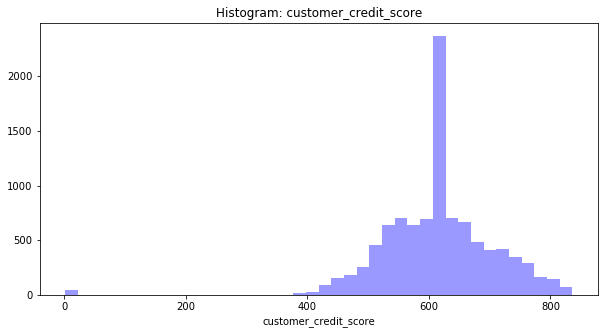

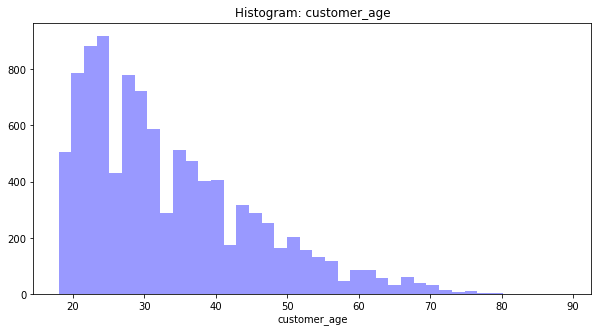

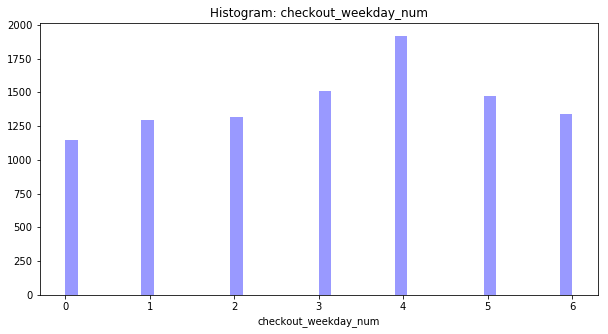

In [19]:
p = viz.get_historgram(df=orders, x='order_amount', height=5, width=15, bins=50)
p = viz.get_historgram(df=orders, x='customer_credit_score', height=5, width=10, bins=40)
p = viz.get_historgram(df=orders, x='customer_age', height=5, width=10, bins=40)
p = viz.get_historgram(df=orders, x='checkout_weekday_num', height=5, width=10, bins=40)


<br>

### Crossplot correlation of customer metrics

__Approach__

As a first step, view correlation plot across customer metrics. From here, we can dig further into notable relationships.

__Takeaways__
+ `paid_installment_N` have a high, positive correlation among themselves. Obviously, paying earlier installments results in a higher likelihood of paying future ones. 

+ `customer_credit_score` has a positive correlation with `paid_installment_N` and `order_amount`. This means that customers with higher credit scores tend to make large purchases but also tend to pay them back more often. 

+ `customer_age` has a positive correlation with `paid_installment_N` and `order_amount`. Similar to credit score, older customers make larger purchases and repay at a higher rate. We should look at the interaction between these variables.

+ `order_amount` has a weak correlation with `paid_installment_N`, meaning that the size of orders don't have a substantial impact of customers' ability to pay.


In [20]:

corr = orders[[
    'order_amount',
    'customer_credit_score',
    'customer_age',
    'paid_installment_2',
    'paid_installment_3',
    'paid_installment_4',
    'order_amount_cum_sum',
    'order_amount_cum_avg',
    'paid_installment_1_cum_avg',
    'paid_installment_2_cum_avg',
    'paid_installment_3_cum_avg',
    'paid_installment_4_cum_avg',
]].corr()
corr.style.background_gradient(cmap='coolwarm')


,order_amount,customer_credit_score,customer_age,paid_installment_2,paid_installment_3,paid_installment_4,order_amount_cum_sum,order_amount_cum_avg,paid_installment_1_cum_avg,paid_installment_2_cum_avg,paid_installment_3_cum_avg,paid_installment_4_cum_avg
order_amount,1,0.129609,0.148627,-0.00434189,0.0092609,0.00226358,1,1,-0.0234817,-0.00434189,0.00963048,-0.0082621
customer_credit_score,0.129609,1,0.0603214,0.104311,0.135308,0.152538,0.129609,0.129609,-0.0123882,0.104311,0.133821,0.104833
customer_age,0.148627,0.0603214,1,0.0166046,0.0398276,0.046533,0.148627,0.148627,0.00716391,0.0166046,0.0388703,0.0390384
paid_installment_2,-0.00434189,0.104311,0.0166046,1,0.550282,0.458057,-0.00434189,-0.00434189,-0.00212622,1,0.547386,0.320809
paid_installment_3,0.0092609,0.135308,0.0398276,0.550282,1,0.636831,0.0092609,0.0092609,-0.00289948,0.550282,1,0.449905
paid_installment_4,0.00226358,0.152538,0.046533,0.458057,0.636831,1,0.00226358,0.00226358,-0.00366939,0.458057,0.633085,1
order_amount_cum_sum,1,0.129609,0.148627,-0.00434189,0.0092609,0.00226358,1,1,-0.0234817,-0.00434189,0.00963048,-0.0082621
order_amount_cum_avg,1,0.129609,0.148627,-0.00434189,0.0092609,0.00226358,1,1,-0.0234817,-0.00434189,0.00963048,-0.0082621
paid_installment_1_cum_avg,-0.0234817,-0.0123882,0.00716391,-0.00212622,-0.00289948,-0.00366939,-0.0234817,-0.0234817,1,-0.00212622,-0.00291325,-0.00507083
paid_installment_2_cum_avg,-0.00434189,0.104311,0.0166046,1,0.550282,0.458057,-0.00434189,-0.00434189,-0.00212622,1,0.547386,0.320809


<br>

### Impact of credit score and order amount on repayment

__Approach__ 

Here, we'll dig into the relationship between credit scores, order amounts, and customers' ability to pay.

__Takeaways__

+ `customer_credit_score` has a strong influence of users' ability to repay. __Customers with less than a 500 credit score have a high default rate__, especially when making purchases for more than $300. We should consider building models specifically for users with lower credit scores to identify nuanes in purchase behavior, customer profiles and repayment rates within this group. 

+ As previously discussed, __order amount doesn't have a substantial impact on repayments. Even high-credit customers default on smaller purchases__. Surprisingly, high-credit customers (i.e. those with 620+ score) have a high repayment for $500+ purchases. 

+ __High-credit customers tend to make larger purchases__; however, this doesn't impact repayment rates. This is logical because they likely have more disposable income. 

+ __When lower-credit users make large orders, they tend to default.__ Low-credit users have a high default rate for purchases greater than $300.

+ Since order amount is a weak indicator of repayment, we should look into the type of purchases customers make and how they influence repayment. 


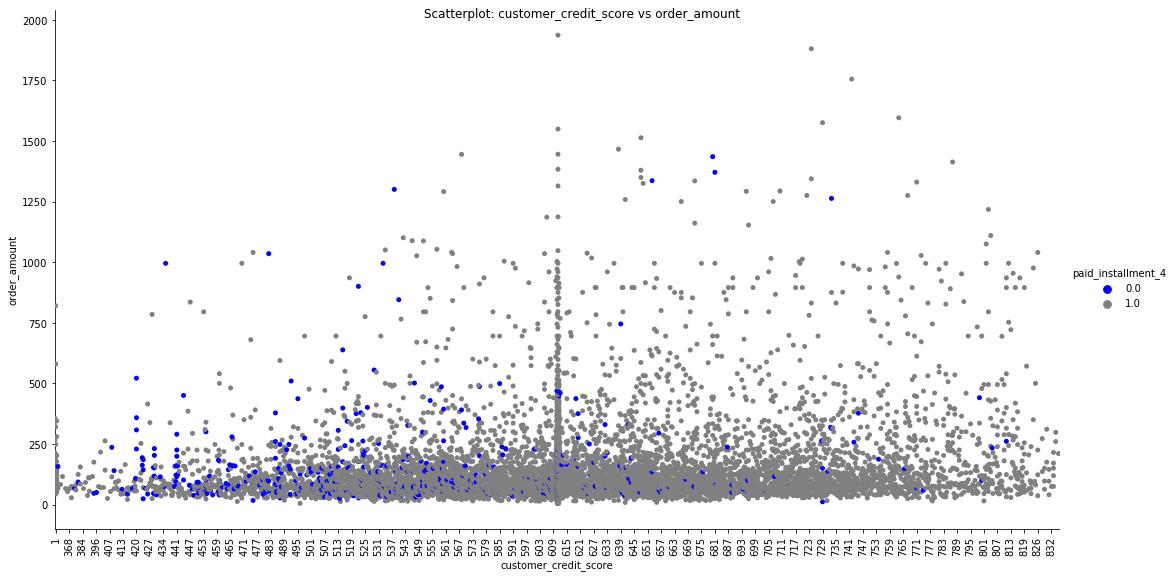

In [7]:
# viz.get_scatterplot(orders, x = "customer_credit_score", y = "order_amount", height = 8, width = 15, hue = "paid_installment_4")
p = viz.get_scatterplot(orders, x = "customer_credit_score", y = "order_amount", height = 8, width = 15, hue = "paid_installment_4")
p.savefig("Customer Credit Score vs Order Amount.png")


<br>

### Impact of credit score and age on repayment

__Approach__ 

Here, we'll dig into the relationship between customers' credit scores and age to understand their ability to pay.

__Takeaways__

+ __Customers over 60 years old have far higher repayment rates.__

+ __Customers less than 30 years old have far lower repayment rates.__ This is particularly true for customers with less than a 600 credit score.

+ Age doesn't have a substantial impact on repayment when customers have higher than a 700 credit score. 


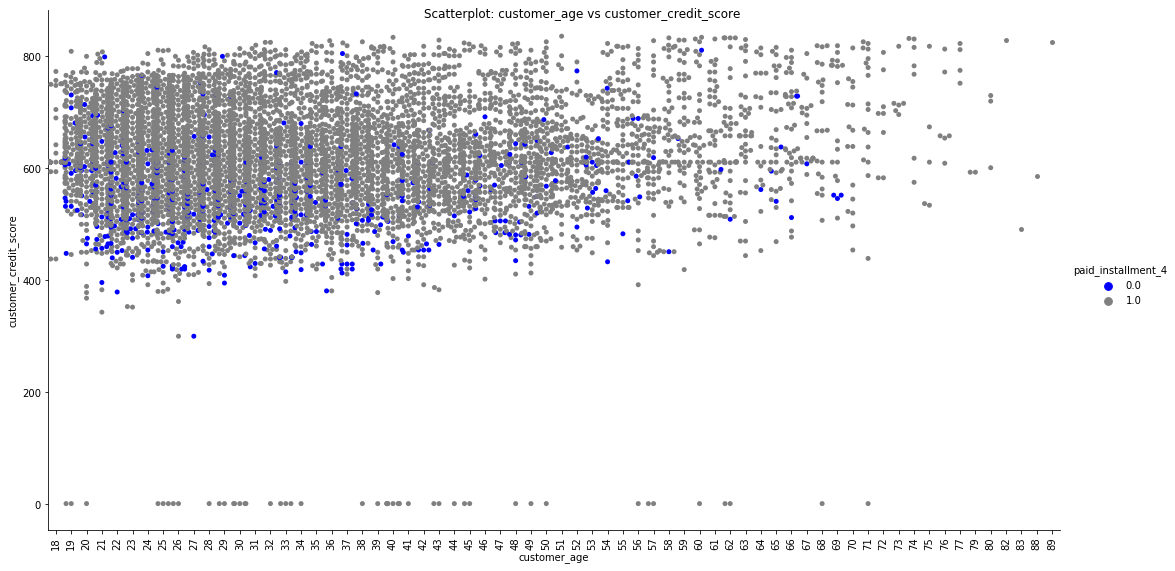

In [8]:
p = viz.get_scatterplot(orders, x = "customer_age", y = "customer_credit_score", height = 8, width = 15, hue = "paid_installment_4")
p.savefig("Customer Age vs Customer Credit Score.png")


<br>

### Progression of repayment across installments
+ We can use a simple segmentation to understand orders:
    - __Low Credit, Low Order (LCLO)__. credit less than 610; order less than 250 USD
    - __Low Credit, High Order (LCHO)__. credit less than 610; order more than 250 USD
    - __High Credit, Low Order (HCLO)__. credit more than 610; order less than 250 USD
    - __High Credit, High Order (HCHO)__. credit more than 610; order more than 250 USD
    


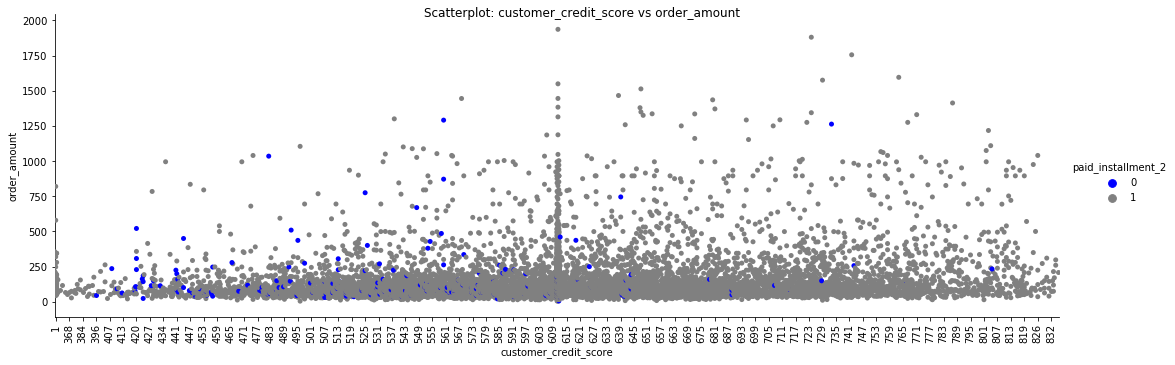

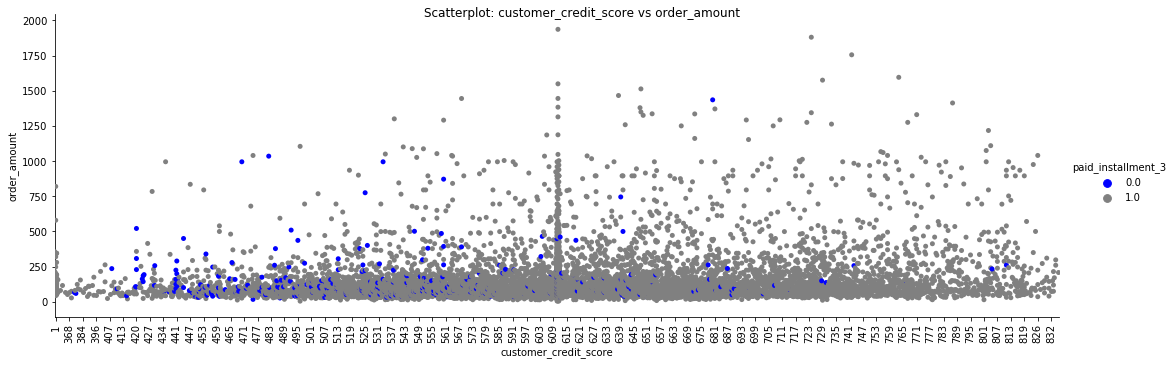

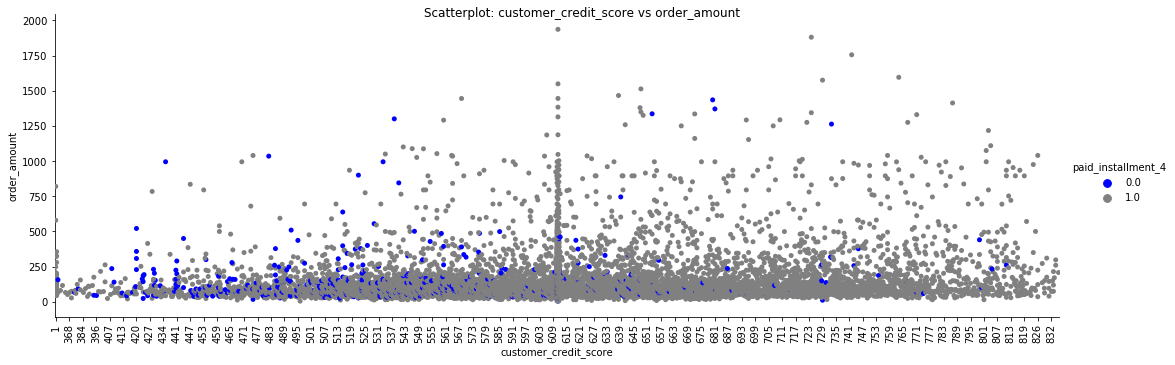

In [9]:

p2 = viz.get_scatterplot(orders, x = "customer_credit_score", y = "order_amount", height = 5, width = 15, hue = "paid_installment_2")
p3 = viz.get_scatterplot(orders, x = "customer_credit_score", y = "order_amount", height = 5, width = 15, hue = "paid_installment_3")
p4 = viz.get_scatterplot(orders, x = "customer_credit_score", y = "order_amount", height = 5, width = 15, hue = "paid_installment_4")

p2.savefig("Customer Credit Score vs Order Amount - Installment 2.png")
p3.savefig("Customer Credit Score vs Order Amount - Installment 3.png")
p4.savefig("Customer Credit Score vs Order Amount - Installment 4.png")


<br>

### Differences in transactions and repayment by merchant

__Approach__ <br>
We've aggregated transactions by Merchant ID to understand behavior across merchants. Aggregate merchant metrics can be used alongside the transaction data to predict defaults.

<br>

__Takeaways__
+ There's a long tail of smaller retailers and a handful of large retailers.
+ Certain merchants have far lower repayment rates than others, with some even having repayment rates of 0%. __A store's historical repayment rate may be an indicator of a single transaction's likelihood of repayment.__
+ For certain retailers, there's a high level of variance in order size. Most merchants tend to have a long tail of large orders. 
+ Stores that have higher order amounts tend to have fewer total orders.



In [51]:

# get orders by merchant ID
fields = ['merchant_id', 'order_amount', 'orders', 
          'paid_installment_1', 'paid_installment_2', 'paid_installment_3', 'paid_installment_4',]
merchants = pd.DataFrame(orders[fields].groupby('merchant_id').sum())
merchants = merchants.reset_index()
merchants['avg_order_amount'] = merchants['order_amount'] / merchants['orders']
merchants['pct_paid_installment_1'] = merchants['paid_installment_1'] / merchants['orders']
merchants['pct_paid_installment_2'] = merchants['paid_installment_2'] / merchants['orders']
merchants['pct_paid_installment_3'] = merchants['paid_installment_3'] / merchants['orders']
merchants['pct_paid_installment_4'] = merchants['paid_installment_4'] / merchants['orders']
merchants.head()


,merchant_id,order_amount,orders,paid_installment_1,paid_installment_2,paid_installment_3,paid_installment_4,avg_order_amount,pct_paid_installment_1,pct_paid_installment_2,pct_paid_installment_3,pct_paid_installment_4
0,01B43C,985.00,4,4.0,4,4.0,3.0,246.250000,1.0,1.000000,1.000000,0.750000
1,01C9EC,351.00,5,5.0,5,5.0,5.0,70.200000,1.0,1.000000,1.000000,1.000000
2,01CF9F,452.00,4,4.0,4,4.0,2.0,113.000000,1.0,1.000000,1.000000,0.500000
3,03271F,14614.46,66,66.0,65,64.0,62.0,221.431212,1.0,0.984848,0.969697,0.939394
4,05BCA0,41270.75,248,248.0,246,244.0,225.0,166.414315,1.0,0.991935,0.983871,0.907258


<br>

__Total Orders by Merchant__

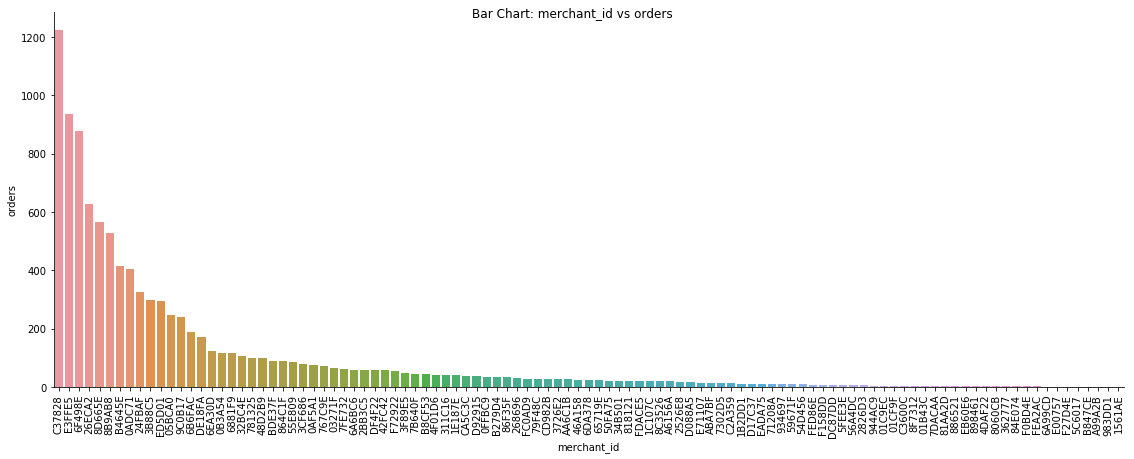

In [63]:
merchants = merchants.sort_values(by='orders', ascending=False)
p = viz.get_bar_chart(df = merchants, x = 'merchant_id', y = 'orders', height = 6, width = 16)
p.savefig("Total Orders by Merchant ID.png")


<br>

__Order Amounts by Merchant - Top 20 Merchants__ <br>
For certain retailers, there's a high level of variance in order size. Most merchants tend to have a long tail of larger orders. 


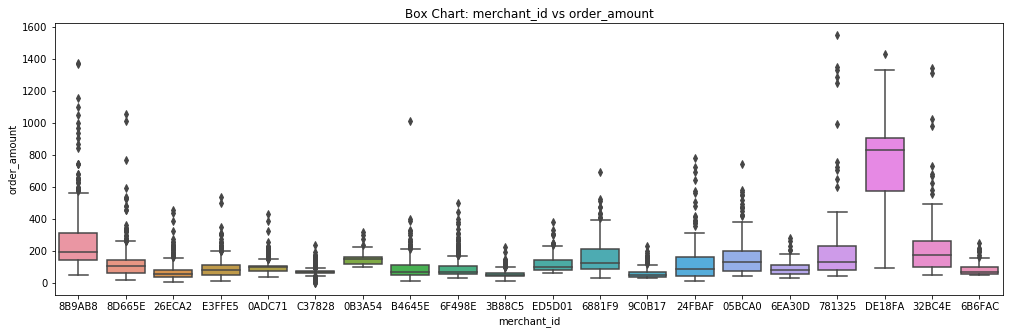

In [64]:
# boxplot of order amount for top 20 merchants
top_merchants = merchants.head(20)
top_merchants_orders = orders[orders['merchant_id'].isin(list(top_merchants.merchant_id))]
p = viz.get_boxplot(df=top_merchants_orders, x='merchant_id', y='order_amount', height=5, width=17)


<br>

__Percent of Paid Installments (for 4th Installment) by Merchant__ <br>
Certain merchants have far lower repayment rates than others, with some even having repayment rates of 0%. A stores historical repayment rate may be an indicator of a single transaction's likelihood of repayment.



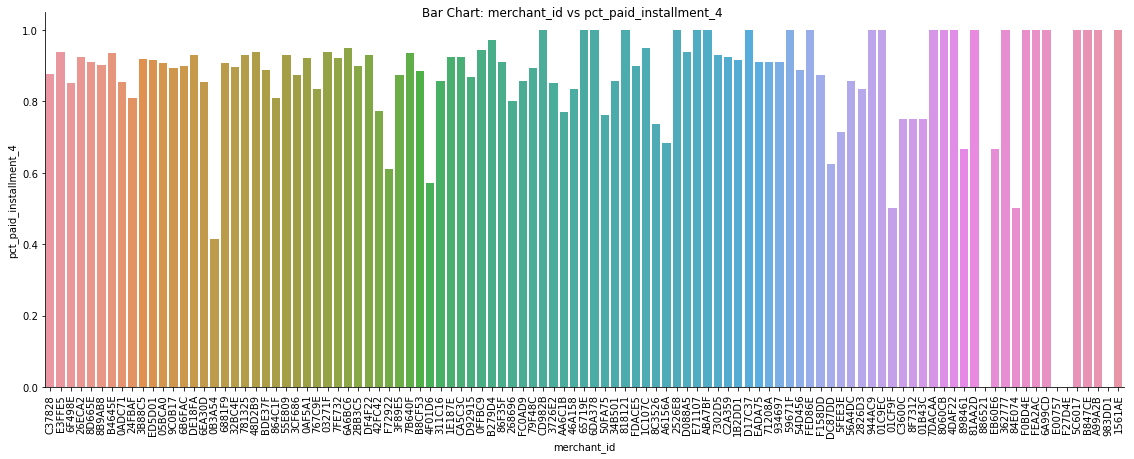

In [62]:
p = viz.get_bar_chart(df = merchants, x = 'merchant_id', y = 'pct_paid_installment_4', height = 6, width = 16)
p.savefig("Repayment Rate (Installment 4) by Merchant ID.png")


<br>

__Total Orders vs Average Order Amount by Merchant__ <br>
Stores that have higher order amounts tend to have fewer total orders.


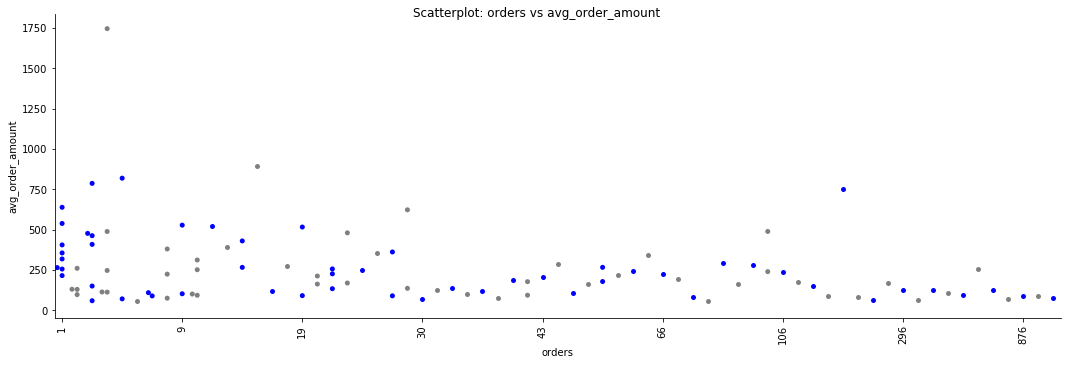

In [70]:
p = viz.get_scatterplot(merchants, x = "orders", y = "avg_order_amount", height = 5, width = 15)
